In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
from sklearn.metrics import mean_squared_error

In [ ]:
df=pd.read_excel('/content/concatrain.xlsx')
df.head()

,Date,rain
0,01-Jan-1955,0
1,02-Jan-1955,0
2,03-Jan-1955,0
3,04-Jan-1955,0
4,05-Jan-1955,0


In [ ]:
df['Date']=df["Date"].astype("datetime64")
df_ann = df.set_index("Date")
df_ann.head()

,rain
Date,
1955-01-01,0
1955-01-02,0
1955-01-03,0
1955-01-04,0
1955-01-05,0


In [ ]:
color_pal = sns.color_palette()
plt.style.use('fivethirtyeight')

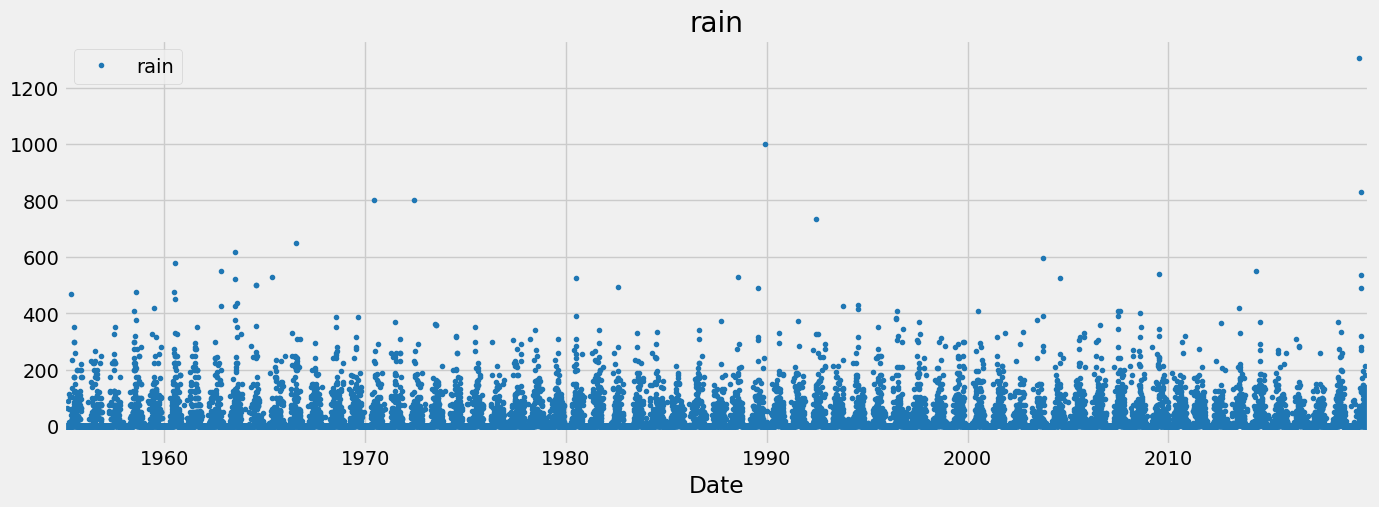

In [ ]:
df_ann.plot(style='.',
        figsize=(15, 5),
        color=color_pal[0],
        title='rain')
plt.show()

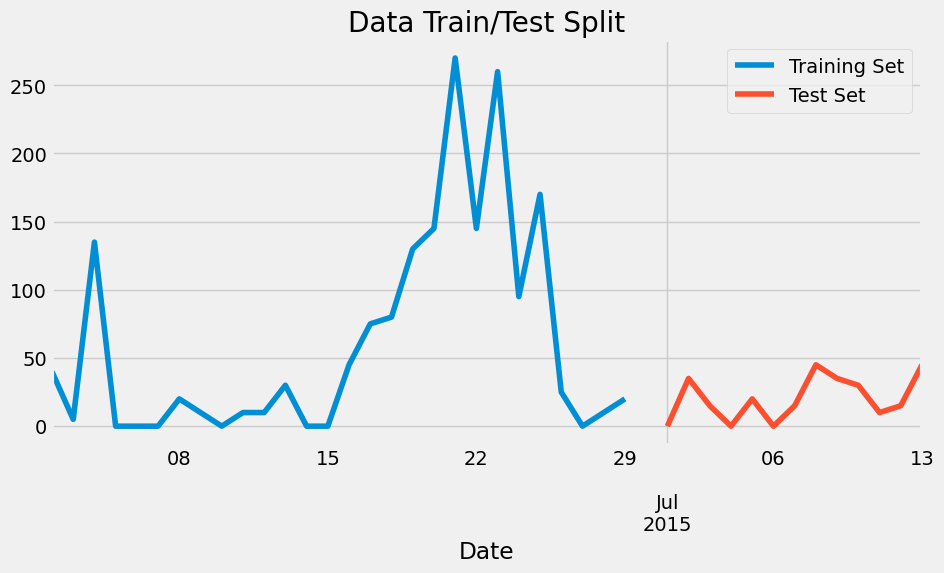

In [ ]:
train = df_ann.loc[(df_ann.index >'06-01-2015')&(df_ann.index<'06-30-2015')]
test = df_ann.loc[(df_ann.index >= '07-01-2015')&(df_ann.index <'07-14-2015')]

fig, ax = plt.subplots(figsize=(10,5))
train.plot(ax=ax, label='Training Set', title='Data Train/Test Split')
test.plot(ax=ax, label='Test Set')
#ax.axvline('01-01-2016', color='black', ls='--')
ax.legend(['Training Set', 'Test Set'])
plt.show()

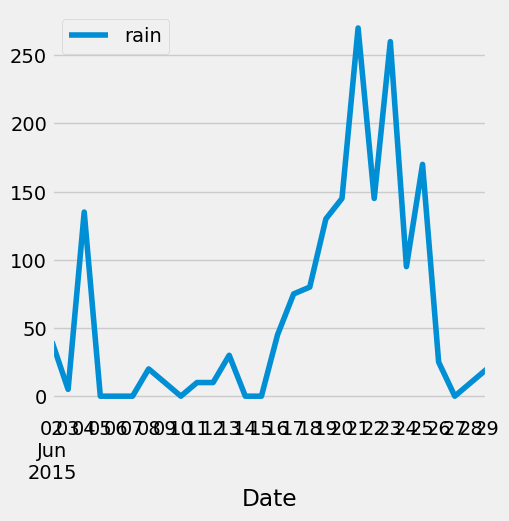

In [ ]:
fig, ax = plt.subplots(figsize=(5,5))
train.plot(ax=ax, label='Test Set')
plt.show()

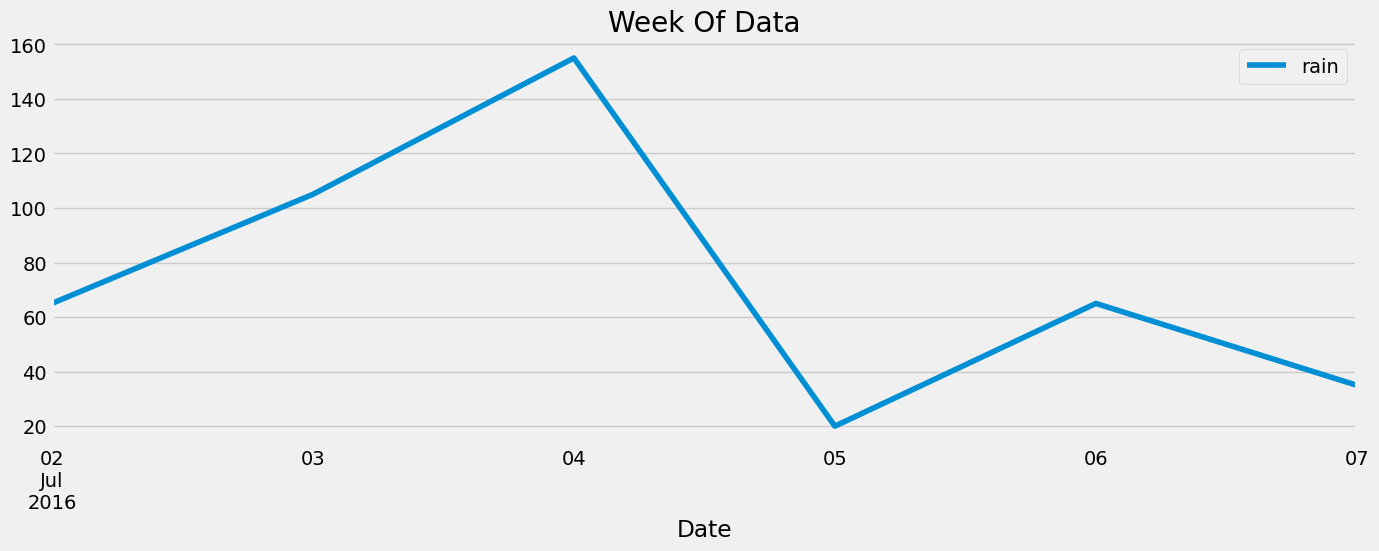

In [ ]:
df_ann.loc[(df_ann.index > '07-01-2016') & (df_ann.index < '07-08-2016')].plot(figsize=(15, 5), title='Week Of Data')
plt.show()

days of week

In [ ]:
    df_ann['dayofweek'] = df_ann.index.dayofweek
    df_ann['quarter'] = df_ann.index.quarter
    df_ann['month'] = df_ann.index.month
    df_ann['year'] = df_ann.index.year
    df_ann['dayofyear'] = df_ann.index.dayofyear
    df_ann['dayofmonth'] = df_ann.index.day
    df_ann['weekofyear'] = df_ann.index.isocalendar().week

In [ ]:
df_ann.head()

,rain,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear
Date,,,,,,,,
1955-01-01,0,5,1,1,1955,1,1,52
1955-01-02,0,6,1,1,1955,2,2,52
1955-01-03,0,0,1,1,1955,3,3,1
1955-01-04,0,1,1,1,1955,4,4,1
1955-01-05,0,2,1,1,1955,5,5,1


model creation

In [ ]:
train['dayofweek'] = train.index.dayofweek
train['quarter'] = train.index.quarter
train['month'] = train.index.month
train['year'] = train.index.year
train['dayofyear'] = train.index.dayofyear
train['dayofmonth'] = train.index.day
train['weekofyear'] = train.index.isocalendar().week

<ipython-input-22-69ceb6d94e7d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['dayofweek'] = train.index.dayofweek
<ipython-input-22-69ceb6d94e7d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['quarter'] = train.index.quarter
<ipython-input-22-69ceb6d94e7d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/u

In [ ]:
test['dayofweek'] = test.index.dayofweek
test['quarter'] = test.index.quarter
test['month'] = test.index.month
test['year'] = test.index.year
test['dayofyear'] = test.index.dayofyear
test['dayofmonth'] = test.index.day
test['weekofyear'] = test.index.isocalendar().week

<ipython-input-23-8c2fd1dab735>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['dayofweek'] = test.index.dayofweek
<ipython-input-23-8c2fd1dab735>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['quarter'] = test.index.quarter
<ipython-input-23-8c2fd1dab735>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_

In [ ]:
ftr= ['dayofyear', 'quarter', 'month', 'year']
tgt = 'rain'

In [ ]:
train.head()

,rain,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear
Date,,,,,,,,
2015-06-02,40,1,2,6,2015,153,2,23
2015-06-03,5,2,2,6,2015,154,3,23
2015-06-04,135,3,2,6,2015,155,4,23
2015-06-05,0,4,2,6,2015,156,5,23
2015-06-06,0,5,2,6,2015,157,6,23


In [ ]:
test.head()

,rain,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear
Date,,,,,,,,
2015-07-01,0,2,3,7,2015,182,1,27
2015-07-02,35,3,3,7,2015,183,2,27
2015-07-03,15,4,3,7,2015,184,3,27
2015-07-04,0,5,3,7,2015,185,4,27
2015-07-05,20,6,3,7,2015,186,5,27


In [ ]:
X_train = train[ftr]
y_train = train[tgt]
X_test = test[ftr]
y_test = test[tgt]

In [ ]:
reg = xgb.XGBRegressor(base_score=0.5, booster='gbtree',
                       n_estimators=1000,
                       early_stopping_rounds=50,
                       objective='reg:linear',
                       max_depth=3,
                       learning_rate=0.01)
reg.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        verbose=100)

[0]	validation_0-rmse:97.87614	validation_1-rmse:25.20469


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [09:53:19] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


[100]	validation_0-rmse:51.04692	validation_1-rmse:21.02177
[200]	validation_0-rmse:31.73558	validation_1-rmse:16.76906
[300]	validation_0-rmse:24.32607	validation_1-rmse:15.94792
[400]	validation_0-rmse:19.52791	validation_1-rmse:15.63920
[495]	validation_0-rmse:16.11861	validation_1-rmse:15.62970


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=50,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, objective='reg:linear', ...)

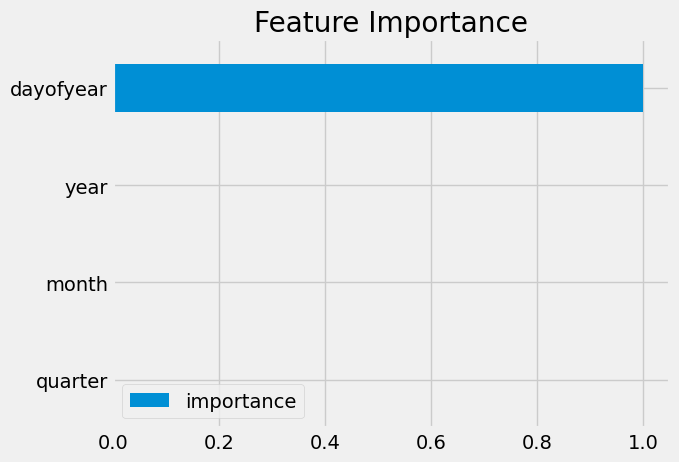

In [ ]:
fi = pd.DataFrame(data=reg.feature_importances_,
             index=reg.feature_names_in_,
             columns=['importance'])
fi.sort_values('importance').plot(kind='barh', title='Feature Importance')
plt.show()

In [ ]:
df_small=df_ann.loc[(df_ann.index >= '07-01-2015')&(df_ann.index <'07-14-2015')]

<ipython-input-45-d2ad76d9bd4a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['prediction'] = reg.predict(X_test)


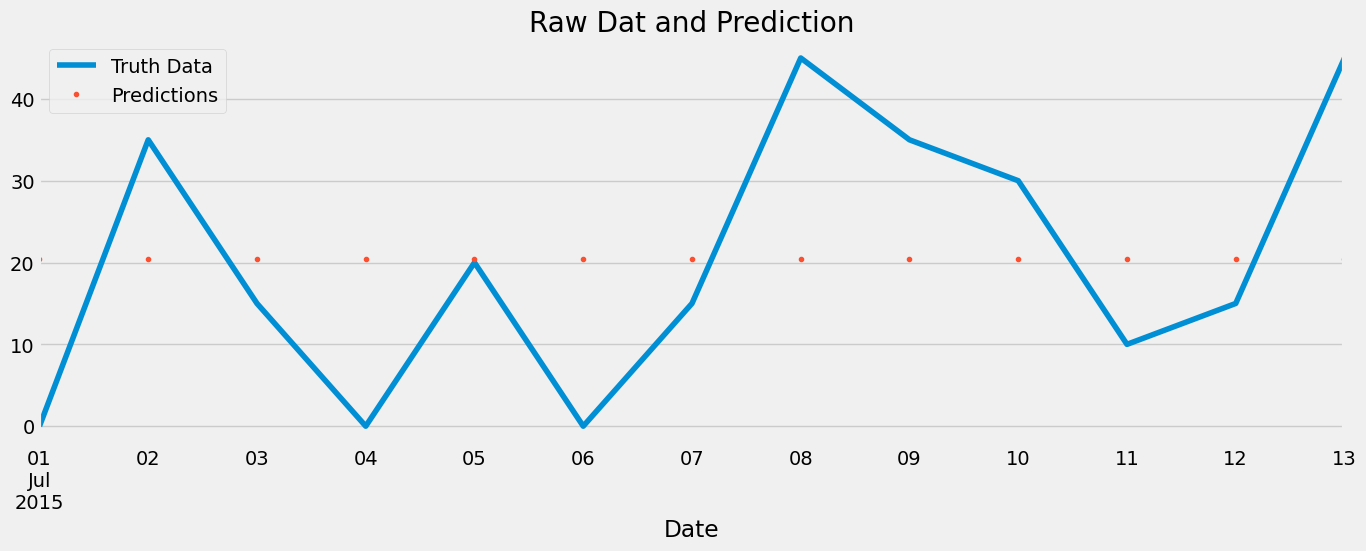

In [ ]:
test['prediction'] = reg.predict(X_test)
df_small= df_small.merge(test[['prediction']], how='left', left_index=True, right_index=True)
ax = df_small[['rain']].plot(figsize=(15, 5))
df_small['prediction'].plot(ax=ax, style='.')
plt.legend(['Truth Data', 'Predictions'])
ax.set_title('Raw Dat and Prediction')
plt.show()